In [1]:
from skimage import io, color, util, filters
from skimage.filters import sobel
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2 
from cv2 import matchTemplate, TM_CCOEFF_NORMED, rectangle
import math
from scipy import fftpack as fp
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

# Soal 1

### 1.a. Color Image Histogram

In [2]:
allfiles = os.listdir('./Soal 1')

gugur = list()
sehat = list()
all_img = list()

for file in allfiles:
    if file.startswith('gugur'):
        gugur.append(io.imread(f'Soal 1/{file}'))
        all_img.append((io.imread(f'Soal 1/{file}'), 'gugur'))
    else:
        sehat.append(io.imread(f'Soal 1/{file}'))
        all_img.append((io.imread(f'Soal 1/{file}'), 'sehat'))

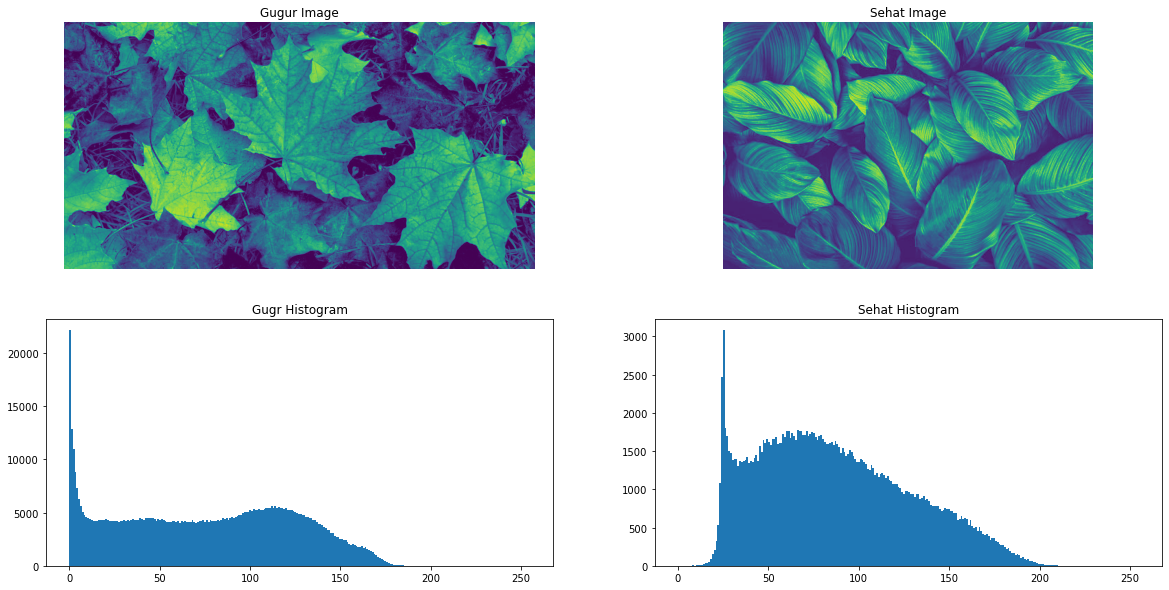

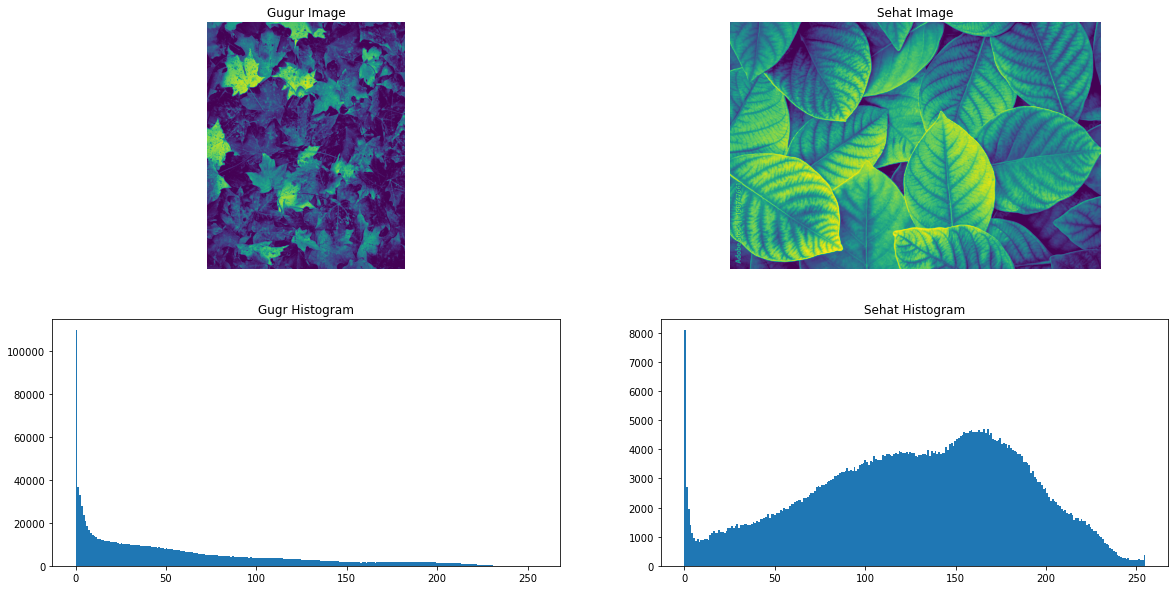

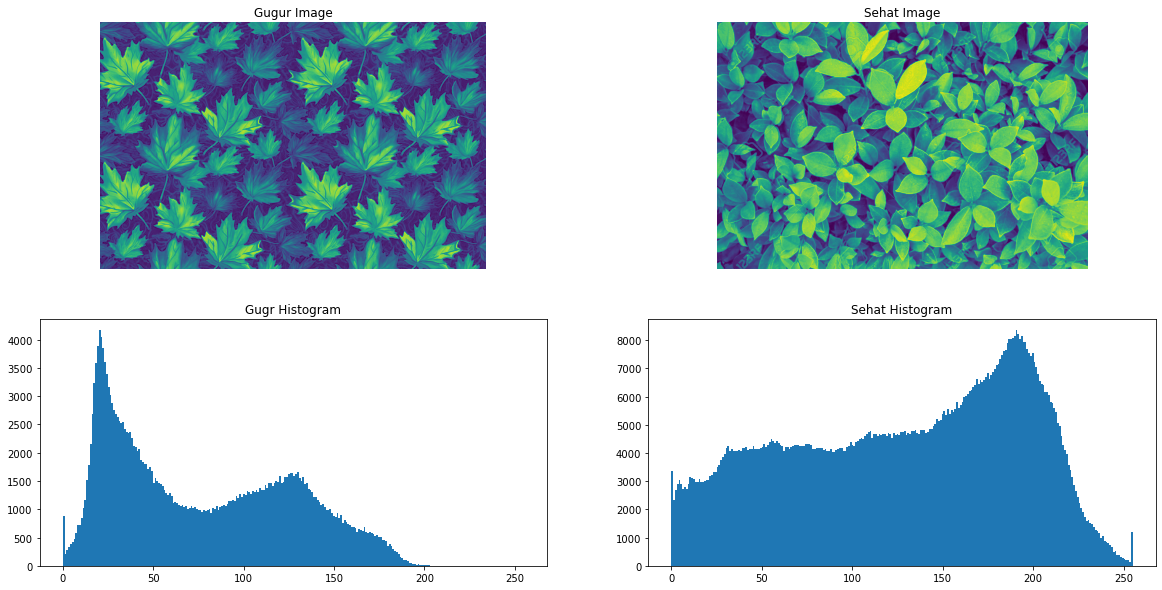

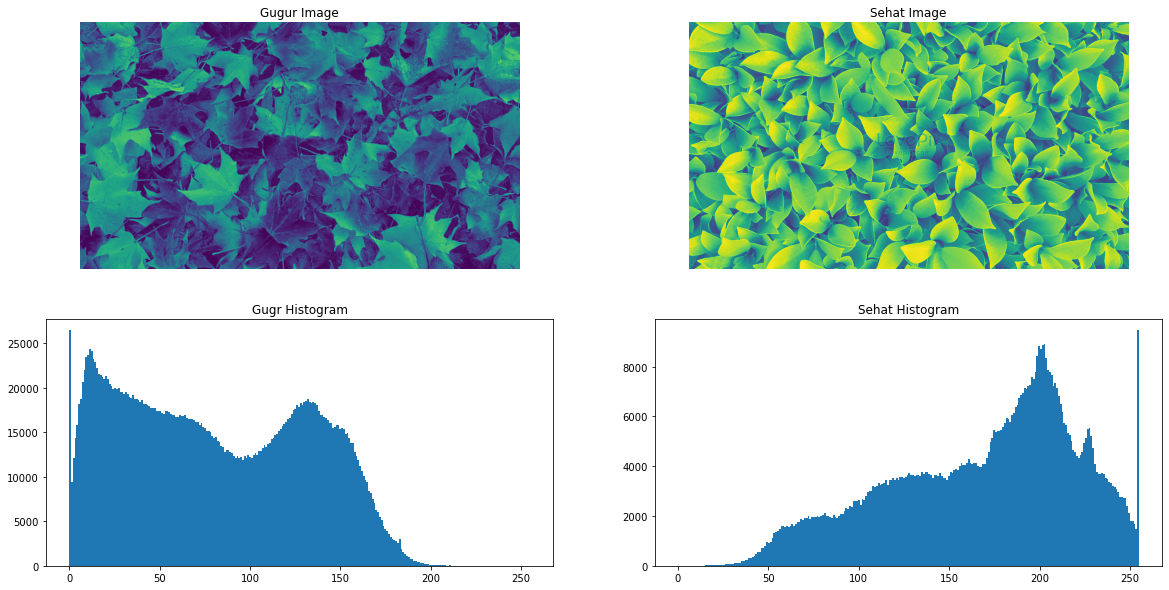

In [3]:
for i in range(4):
    gugur_img = gugur[i][:,:,1]
    sehat_img = sehat[i][:,:,1]
    
    norm_gugur = gugur_img #/ np.max(gugur_img)
    norm_sehat = sehat_img #/ np.max(sehat_img)

    # Show image
    plt.figure(figsize=(20,10))
    plt.subplot(2, 2, 1)
    plt.title('Gugur Image')
    plt.imshow(gugur_img)
    plt.axis('off')
    plt.subplot(2, 2, 2)
    plt.title('Sehat Image')
    plt.imshow(sehat_img)
    plt.axis('off')
    plt.subplot(2, 2, 3)
    plt.title('Gugr Histogram')
    plt.hist(norm_gugur.flatten(), 256, range=(0,255))
    plt.subplot(2, 2, 4)
    plt.title('Sehat Histogram')
    plt.hist(norm_sehat.flatten(), 256, range=(0,255))
    plt.show()

In [4]:
def classify(img):
    img_r = img[:,:,0]
    img_g = img[:,:,1]
    
    r_avg = np.mean(img_r.flatten())
    g_avg = np.mean(img_g.flatten())
    
    if r_avg < g_avg:
        return "Sehat"
    else:
        return "Gugur"

In [5]:
print("===GUGUR===")
for img in gugur:
    print(classify(img))
    
print("\n===SEHAT===")
for img in sehat:
    print(classify(img))

===GUGUR===
Gugur
Gugur
Gugur
Gugur

===SEHAT===
Sehat
Sehat
Sehat
Sehat


### 1.b. Selain Color Image Histogram

In [20]:
train = all_img[:-2]
test = all_img[-2:]
#print(train[0][0])

X = [resize(img, (300, 300)).flatten() for img, _ in train]
for img in X:
    print(np.shape(img))
y = [label for _, label in train]

classifier = SVC(kernel='linear')
classifier.fit(X, y)

(270000,)
(270000,)
(270000,)
(270000,)
(270000,)
(270000,)


SVC(kernel='linear')

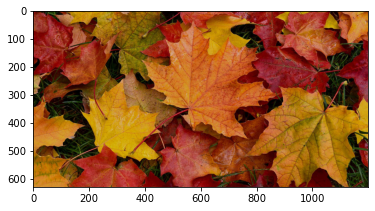

Pred : ['gugur']
Real : gugur


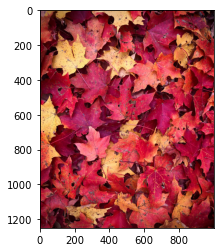

Pred : ['gugur']
Real : gugur


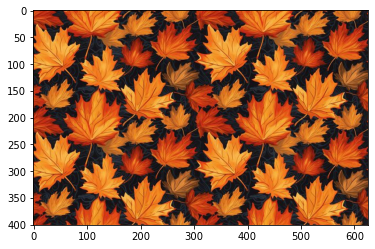

Pred : ['gugur']
Real : gugur


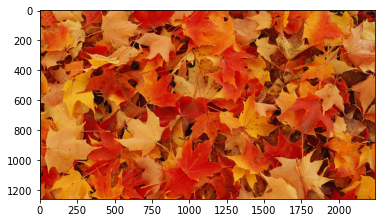

Pred : ['gugur']
Real : gugur


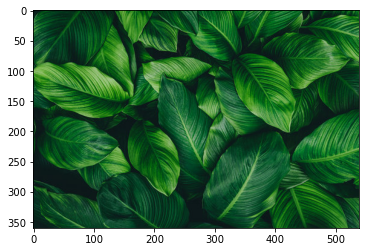

Pred : ['sehat']
Real : sehat


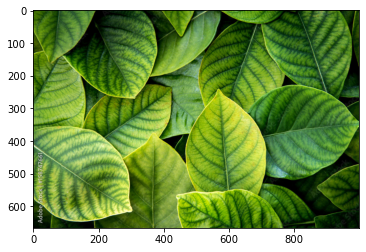

Pred : ['sehat']
Real : sehat


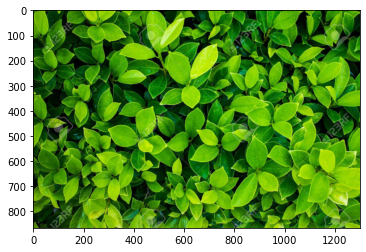

Pred : ['sehat']
Real : sehat


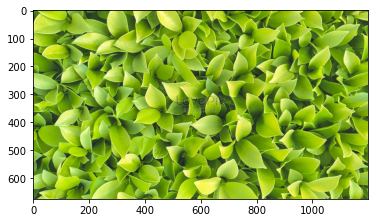

Pred : ['sehat']
Real : sehat


In [27]:
for img, label in all_img:
    plt.imshow(img)
    plt.show()
    print('Pred :', classifier.predict([resize(img, (300, 300)).flatten()]))
    print('Real :', label)

### 1.c.

Pada fitur di (a) kita melakukan pengecekan pada *color image histogram* dan melakukan klasifikasi melalui *thresholding* pada histogram tersebut.

Pada fitur di (b) kita melakukan klasifikasi melalui SVC Classifier dan melakukan training dengan 4 image pertama dan testing dengan 2 image terakhir.

Akurasi yang diberikan kedua pengecekan akurat, akan tetapi perlu diingat bahwa 4 dari 6 citra yang diklasifikasi digunakan untuk training pada bagian (b). Untuk mengambil classifier yang terbaik tergantung pada fitur yang ada untuk diklasifikasi. Meskipun SVC memberikan hasil yang akurat juga, karena perbedaan utama dari citra terdapat pada warna bisa dikatakan Color Image Histogram lebih efektif dalam klasifikasi.

# Soal 2

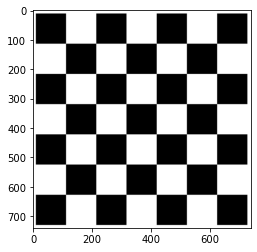

In [28]:
chess = io.imread('Soal 2/chess1.jpg')

plt.imshow(chess)

### 2.a Hough Transform

In [ ]:
new_img = np.copy(chess)

gray = (color.rgb2gray(new_img) * 255).astype(np.uint8)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

x_coord = []
y_coord = []

for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(new_img, (x1,y1), (x2,y2), (255,0,0), 2)
        if x0//1 > 0:
            x_coord.append(x0)
        if y0//1 > 0:
            y_coord.append(y0)
            
print(x_coord)
print(y_coord)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(new_img,)

x_len = len(x_coord) - 1
y_len = len(y_coord) - 1

### 2.b

In [ ]:
luas_kotak = 3

print(f"Panjang = {y_len}")
print(f"Lebar = {x_len}")
print(f"Luas = {x_len*y_len*luas_kotak*luas_kotak}")

### 2.c.

Pada bagian A kita mulai dengan mengambil edge dari gambar. Ini dicapai menggunakan Canny dan dihasilkan citra berupa *outline* dari citra awal. Setelah itu kita mencari line yang ada dalam citra edge menggunakan HoughLines. HoughLines mengembalikan titik awal garis dan juga sudut garis tersebut. Terakhir kita menggambar garis hasil HoughLines.

Pada bagian B jumlah kotak bisa dijadikan jumlah baris - 1 untuk pada X dan Y. Untuk menghitung luas, kita bisa mendapatkan luas 1 kotak (3x3) dan mengalikannya dengan jumlah kotak di X dan di Y.

# Soal 3

In [ ]:
bendera = io.imread("Soal 3/bendera.jpg")
bendera2 = io.imread("Soal 3/bendera2.jpeg")
target = io.imread("Soal 3/target.png", pilmode='RGB')

plt.imshow(bendera)
plt.show()
plt.imshow(bendera2)
plt.show()
plt.imshow(target)
plt.show()

### 3.a 

In [ ]:
thresh = [0.25, 0.4, 0.5, 0.9]

for i in thresh:
    # Read image
    image = util.img_as_ubyte(bendera)
    image2 = util.img_as_ubyte(bendera2)
    template = util.img_as_ubyte(target)

    # To gray
    image_gray = util.img_as_ubyte(color.rgb2gray(image))
    image2_gray = util.img_as_ubyte(color.rgb2gray(image2))
    template_gray = util.img_as_ubyte(color.rgb2gray(template))

    # Get height and width of template
    h, w = template_gray.shape

    # Match template using cv2.matchTemplate
    result = matchTemplate(image_gray, template_gray, TM_CCOEFF_NORMED)
    result2 = matchTemplate(image2_gray, template_gray, TM_CCOEFF_NORMED)

    # Copy image for bounding box
    matched = image.copy()
    matched2 = image2.copy()

    # Thresholding
    threshold = i
    loc = np.where(result >= threshold)
    loc2 = np.where(result2 >= threshold)

    # Create bounding box
    for point in zip(*loc[::-1]):
        rectangle(matched, point, (point[0] + w, point[1] + h), (255,0,0), 1)
        rectangle(matched2, point, (point[0] + w, point[1] + h), (255,0,0), 1)

    # Show image
    plt.figure(figsize=(20,10))
    plt.subplot(141),plt.imshow(image)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(142),plt.imshow(template)
    plt.title('Template'), plt.xticks([]), plt.yticks([])
    plt.subplot(143),plt.imshow(matched)
    plt.title('Template Matched'), plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(matched2)
    plt.title('Template Matched'), plt.xticks([]), plt.yticks([])
    plt.yticks([])
    plt.show()

### 3.b

Perbedaan terdapat pada hasil tenmplate yang di-*match* oleh program. Dengan threshhold yang lebih tinggi, template yang di match semakin akurat. Ini terjadi karena template matching mencocokan template dengan image yang ada dan threshholding menentukan harus seberapa mirip suatu elemen dengan template untuk dapat disebut mirip dengan template.

Match terbagus didapatkan pada threshhold 0.5. 

### 3.c

Kelebihan dari metode ini adalah kemampuannya untuk mencocokan bagian citra dengan template. Akan tetapi, kekurangannya adalah citra harus memiliki kemiripan dengan template. Bila tidak mirip, matchTemplate akan memilih bagian yang paling mirip dan bila didasarkan pada pengujian di atas, output tidak sesuai dengan ekspektasi.

Metode tidak cocok karena meskipun template matching bagus untuk citra yang memiliki template, metode tidak bagus untuk citra kedua yang tidak memiliki target yang sama persis dengan template.